# **[필수 과제1] 보간법 interpolate(method=' ')**

- bike 데이터 가지고 보간법 진행
- 시각화 통해 보간법 수행 후의 변화 확인
- 수업시간에 배운 것 외에 2~3가지 정도 추가 진행해보기

method must be one of

['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

In [8]:
pip install missingno

In [9]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bike data 불러오기

In [4]:
df = pd.read_csv('bike_sharing_daily.csv')

df 파악하기

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


In [10]:
# Na값 개수 확인
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

보간법 수행 **interpolate()**

In [18]:
# 일부 데이터 뽑아서 저장 ([index] 0~49 rows, 10~15 columns)
bike = df.iloc[0:50, 10:16]

In [19]:
bike

,atemp,hum,windspeed,casual,registered,cnt
0,0.363625,0.805833,0.160446,331.0,654.0,985
1,0.353739,0.696087,0.248539,131.0,670.0,801
2,NaN,0.437273,0.248309,120.0,1229.0,1349
3,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,0.229270,0.436957,0.186900,82.0,1518.0,1600
5,0.233209,0.518261,0.089565,88.0,1518.0,1606
6,0.208839,0.498696,0.168726,148.0,1362.0,1510
7,0.162254,0.535833,0.266804,68.0,891.0,959
8,0.116175,0.434167,0.361950,54.0,768.0,822
9,0.150888,0.482917,0.223267,41.0,1280.0,1321


### 'hum' 열 시각화

<Axes: >

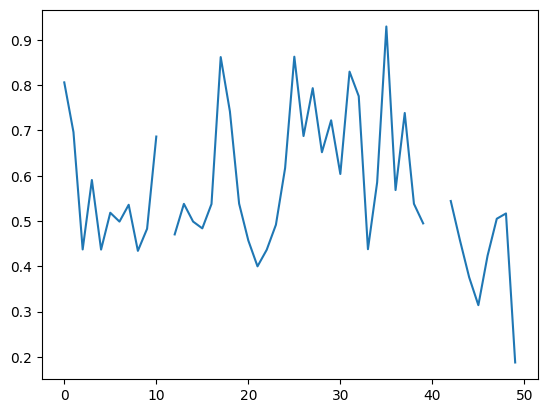

In [21]:
# 보간법 수행 전
bike['hum'].plot()

결측값이 있어 그래프 끊기는 것 확인 가능

---



<Axes: >

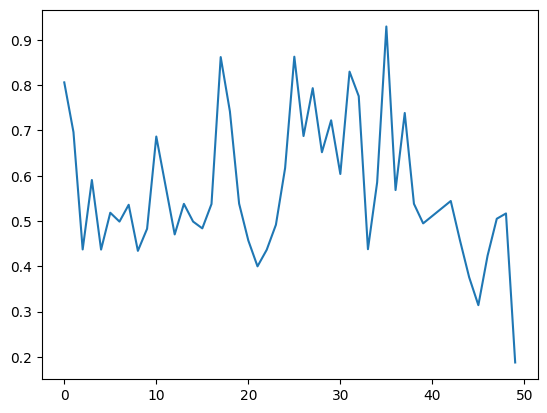

In [22]:
# 선형 보간법 'linear'
bike['hum'].interpolate(method='linear').plot()

두 점 사이를 직선으로 연결 (default)

---



<Axes: >

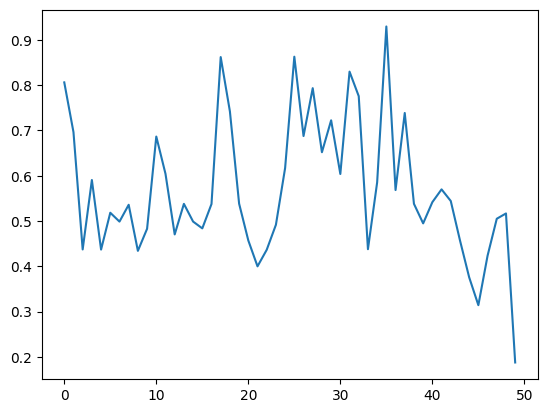

In [27]:
# 좀 더 부드럽게 연결 'cubic'
bike['hum'].interpolate(method='cubic').plot()

<Axes: >

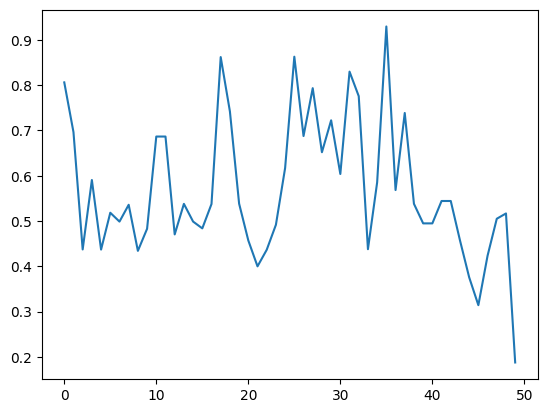

In [41]:
# Piecewise constant 보간법 'nearest'
bike['hum'].interpolate(method='nearest').plot()

최근접 이웃값으로 보간

---



<Axes: >

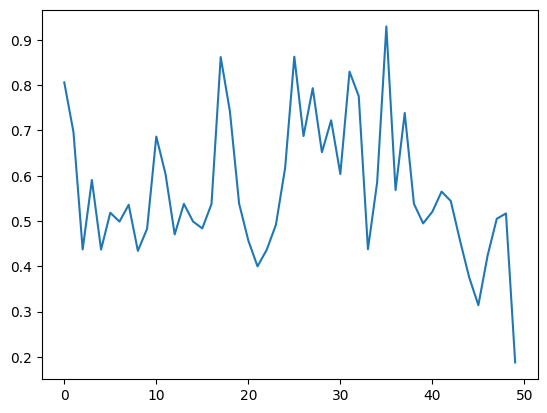

In [39]:
# Polynomial 보간법 'polynomial' (order = 2)
bike['hum'].interpolate(method='polynomial', order=2).plot()

<Axes: >

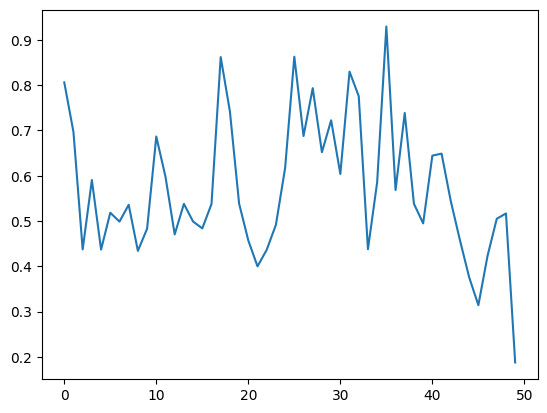

In [38]:
# (order = 5)
bike['hum'].interpolate(method='polynomial', order=5).plot()

<Axes: >

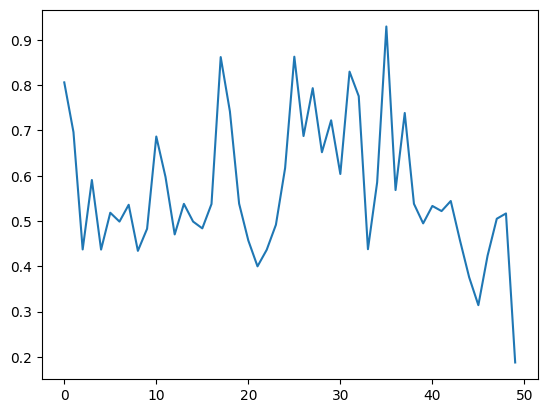

In [30]:
# Spline 보간법 'spline' (2차원)
bike['hum'].interpolate(method='spline', order=2).plot()

<Axes: >

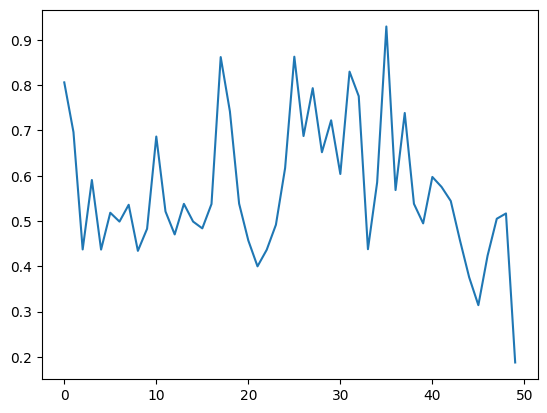

In [31]:
# (3차원)
bike['hum'].interpolate(method='spline', order=3).plot()

Spline 보간법 : order로 차수 높여서 보간 (2차원 이상)